In [1]:
import pandas as pd

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
coordinate_matrix = pd.read_csv("opt_variables/coordinate_matrix.csv")

In [3]:
with open('opt_variables/opt_result.txt', 'r') as res:
    opt_result = res.readlines()
    opt_result = opt_result[0].replace("\n","")
    
opt_result

'1967'

In [4]:
coordinate_matrix.iloc[int(opt_result)]

Unnamed: 0                         417088
ADDRDELIV       7155 SOUTH CORNELL AVENUE
LATITUDE                          41.7645
LONGITUDE                        -87.5844
neighborhood                  South Shore
Name: 1967, dtype: object

In [5]:
opt_result_1000 = ['52',(41.8455,-87.7023)]
opt_result_10000 = ['1967',(41.7645,-87.5844)]
opt_result_50000 = ['20495',(41.7273,-87.5776)]
opt_result_50000 = ['20504',(41.7273,-87.5776)]

In [6]:
df = pd.DataFrame({'sample_size':[1000,10000,50000,150000], "longitude": [-87.5844,-87.7023,-87.5776,-87.5776],
                                                         "latitude":[41.7645,41.8455,41.7273,41.7273]})
df

,sample_size,longitude,latitude
0,1000,-87.5844,41.7645
1,10000,-87.7023,41.8455
2,50000,-87.5776,41.7273
3,150000,-87.5776,41.7273


In [7]:
#! SHAPE_RESTORE_SHX=YES fio info geo_export_7326bade-67ad-48f6-98c8-abed166274de.shp

street_map = gpd.read_file("plot/geo_export_7326bade-67ad-48f6-98c8-abed166274de.shp", SHAPE_RESTORE_SHX = "yes")

In [8]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]))

In [9]:
gdf

,sample_size,longitude,latitude,geometry
0,1000,-87.5844,41.7645,POINT (-87.58440 41.76450)
1,10000,-87.7023,41.8455,POINT (-87.70230 41.84550)
2,50000,-87.5776,41.7273,POINT (-87.57760 41.72730)
3,150000,-87.5776,41.7273,POINT (-87.57760 41.72730)


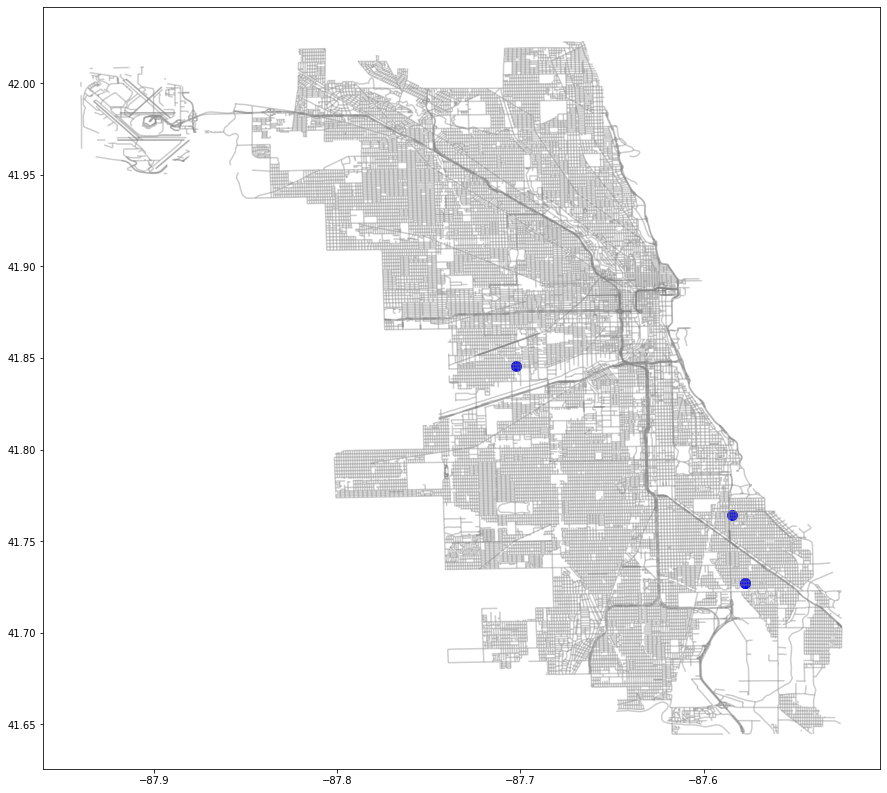

In [10]:
fix, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
gdf.plot(ax=ax, markersize=100, color="blue", marker="o")